In [48]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 29 19:02:27 2020

@author: nacho
"""
#https://datavizpyr.com/highlight-a-time-range-in-time-series-plot-in-python-with-matplotlib/
#%%
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
sns.set(color_codes=True)
import os, datetime
from collections import Counter
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as ticker

In [49]:
entidad_federativa = 14
entidad_federativa_str = "Jalisco"

In [52]:
path = "/home/nacho/Documents/coronavirus/Data_Mexico"
os.chdir(os.path.join(path)) 
df_og = pd.read_csv("data/covid_data.zip")
#SOLO CASOS POSITIVOS COVID
df_og = df_og[df_og.RESULTADO == 1] #En caso de que se quiera filtrar por s{olo los que dieron positivo
df_og.drop(['RESULTADO'], axis=1, inplace = True)
df= df_og.copy()
#Solo entidad
df.drop(df[(df['ENTIDAD_UM'] != entidad_federativa)].index, inplace = True)


In [55]:
df.head(5)

,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI,DIAS_DIF_HOSP,BOOL_DEF,DIAS_DIF_DEF
6,4,14,0,14,1,2020-03-27,2020-03-27,2020-03-31,0,1,...,0,1,1,2,97,3,0,0,1,4
9,12,14,1,14,0,2020-03-18,2020-03-15,NaN,0,0,...,1,1,1,2,97,3,0,3,0,0
48,12,14,0,14,0,2020-03-30,2020-03-23,NaN,0,0,...,0,1,1,2,97,3,0,7,0,0
87,12,14,0,14,0,2020-03-19,2020-03-18,NaN,0,0,...,0,1,1,2,97,3,0,1,0,0
225,4,14,0,14,0,2020-03-19,2020-03-17,NaN,0,0,...,1,1,1,2,97,3,0,2,0,0


In [54]:
print("Numero de casos positivos de COVID: ", len(df))
print("Numero de hospitalizados por COVID: ", df.TIPO_PACIENTE.value_counts()[1])
print("Numero de intubados por COVID: ", df.INTUBADO.value_counts()[1])
print("Numero de fallecidos por COVID: ", df.BOOL_DEF.value_counts()[1])
print("Numero de UCI por COVID: ", df.UCI.value_counts()[1])

Numero de casos positivos de COVID:  40419
Numero de hospitalizados por COVID:  11299
Numero de intubados por COVID:  1560
Numero de fallecidos por COVID:  4678
Numero de UCI por COVID:  1199


In [56]:
def plot_date(ax):
    txtbox = ax.text(0.0, 0.975, datetime.datetime.now().strftime('%b %d, %Y'), transform=ax.transAxes, fontsize=7,
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='w',alpha=0.5)) 
    txtbox.set_x(1.0-(txtbox.figure.bbox.bounds[2]-(txtbox.clipbox.bounds[2]-txtbox.clipbox.bounds[0]))/txtbox.figure.bbox.bounds[2])


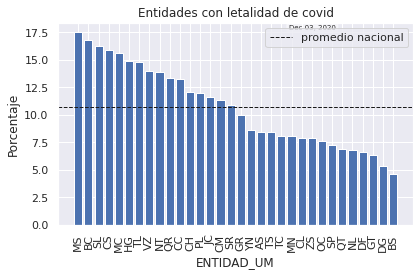

In [57]:
def estados_let(df):
    df_def = df[df.BOOL_DEF == 1]
    df_estados = pd.read_csv("diccionario_datos_covid19/diccionario_estados.csv",index_col=False)
    df_estados = df_estados.iloc[:,[0,2]]
    dict_estados = df_estados.set_index('CLAVE_ENTIDAD').T.to_dict('list')
    def get_value(val, my_dict):
        for key,value in my_dict.items():
            if val == key:
                return value
    fig, ax = plt.subplots() 
    height = df['ENTIDAD_UM'].value_counts().rename_axis('unique_values').to_frame('counts')
    height_def = df_def['ENTIDAD_UM'].value_counts().rename_axis('unique_values').to_frame('counts')
    height.sort_index(inplace=True)
    height_def.sort_index(inplace=True)
    let_percentage =  height_def/height*100
    let_percentage = let_percentage.sort_values('counts', ascending=False)
    bars = np.asarray(let_percentage.index)
    let_percentage= let_percentage.values
    let_percentage = np.array(let_percentage).ravel()
    string_bars = [get_value(bars[i],dict_estados) for i in range(len(bars))]
    string_bars = [i[0] for i in string_bars]
    y_pos = np.arange(len(bars))
    ax.bar(y_pos, let_percentage)
    def_mean = let_percentage.mean()
    plt.axhline(y=def_mean,linewidth=1, color='k',linestyle='--',label='promedio nacional')
    ax.set_title('Entidades con letalidad de covid') 
    plt.xticks(y_pos, string_bars,rotation='vertical')
    ax.set_xlabel('ENTIDAD_UM') 
    ax.set_ylabel('Porcentaje')
    plot_date(ax)
    plt.legend(loc ='upper right') 
    fig.tight_layout()
estados_let(df_og)

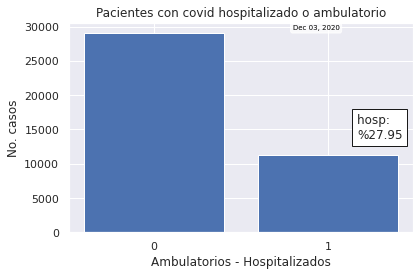

In [59]:
def grafica3(df):
    fig, ax = plt.subplots() 
    plot_date(ax)
    ax.bar((df['TIPO_PACIENTE'].value_counts()).index, (df['TIPO_PACIENTE'].value_counts()).values) 
    ax.set_title('Pacientes con covid hospitalizado o ambulatorio') 
    ax.set_xlabel('Ambulatorios - Hospitalizados') 
    ax.set_ylabel('No. casos')
    ax.set_xticks((df['TIPO_PACIENTE'].value_counts()).index)
    texto="hosp: \n%"+str(round(df['TIPO_PACIENTE'].value_counts().values[1]/len(df['TIPO_PACIENTE'])*100,2))
    anchored_text = AnchoredText(texto, loc="center right")
    ax.add_artist(anchored_text)
    plot_date(ax)
    fig.tight_layout()
grafica3(df)

Pacientes Hospitalizados Intubados:
 0    9739
1    1560
Name: INTUBADO, dtype: int64
Porcentaje de pacientes hospitalizados e intubados:  4.014514012197947


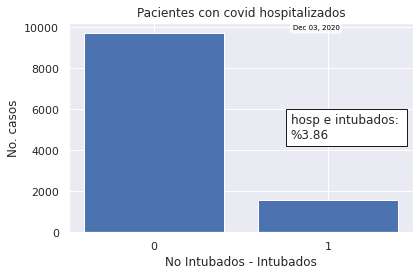

In [60]:
#%%INTUBADOS PORCENTAJE
def grafica4(df):
    df['TIPO_PACIENTE'].value_counts()
    df_aux = df.loc[df.TIPO_PACIENTE == 1]
    df_aux.drop(['TIPO_PACIENTE'], axis=1, inplace = True)
    #print("Pacientes Hospitalizados Intubados:\n", df_aux['INTUBADO'].value_counts())
    #print("Porcentaje de pacientes hospitalizados e intubados: ",((df['INTUBADO'].value_counts()).values[1]/(df['INTUBADO'].value_counts()).values[0])*100)
    fig, ax = plt.subplots() 
    plot_date(ax)
    ax.bar((df_aux['INTUBADO'].value_counts()).index, (df_aux['INTUBADO'].value_counts()).values) 
    ax.set_title('Pacientes con covid hospitalizados') 
    ax.set_xlabel('No Intubados - Intubados') 
    ax.set_ylabel('No. casos')
    ax.set_xticks((df_aux['INTUBADO'].value_counts()).index)
    texto="hosp e intubados: \n%"+str(round(df['INTUBADO'].value_counts().values[1]/len(df['INTUBADO'])*100,2))
    anchored_text = AnchoredText(texto, loc="center right")
    ax.add_artist(anchored_text)
    plot_date(ax)
    fig.tight_layout()
    print("Pacientes Hospitalizados Intubados:\n", df_aux['INTUBADO'].value_counts())
    print("Porcentaje de pacientes hospitalizados e intubados: ",((df['INTUBADO'].value_counts()).values[1]/(df['INTUBADO'].value_counts()).values[0])*100)
grafica4(df)

Casos con covid fallecidos:
 0    35741
1     4678
Name: BOOL_DEF, dtype: int64
Porcentaje de mortalidad:  11.573764813577773


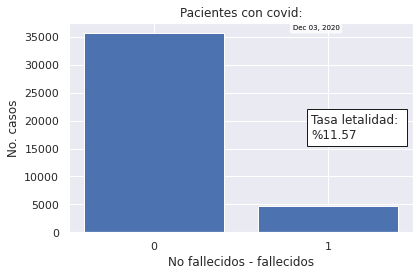

In [61]:
#%%MORTALIDAD PORCENTAJE
def grafica5(df):
    print("Casos con covid fallecidos:\n", df['BOOL_DEF'].value_counts())
    print("Porcentaje de mortalidad: ",((df['BOOL_DEF'].value_counts()).values[1]/len(df['BOOL_DEF'])*100))
    fig, ax = plt.subplots() 
    plot_date(ax)
    ax.bar((df['BOOL_DEF'].value_counts()).index, (df['BOOL_DEF'].value_counts()).values) 
    ax.set_title('Pacientes con covid:') 
    ax.set_xlabel('No fallecidos - fallecidos') 
    ax.set_ylabel('No. casos')
    ax.set_xticks((df['BOOL_DEF'].value_counts()).index)
    texto="Tasa letalidad: \n%"+str(round(df['BOOL_DEF'].value_counts().values[1]/len(df['BOOL_DEF'])*100,2))
    anchored_text = AnchoredText(texto, loc="center right")
    ax.add_artist(anchored_text)
    plot_date(ax)
    fig.tight_layout()
grafica5(df)

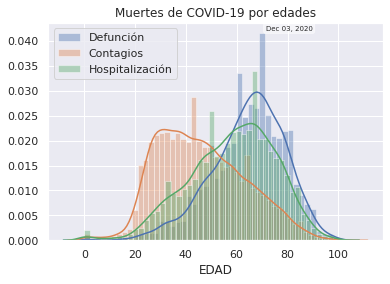

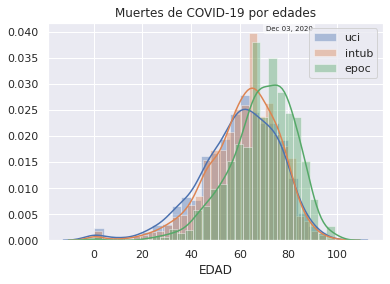

In [65]:
def grafica6(df):
    fig, ax = plt.subplots()
    plot_date(ax)
    df_def = df.loc[df.BOOL_DEF == 1]['EDAD']
    df_cont = df['EDAD']
    df_hosp = df.loc[df.TIPO_PACIENTE == 1]['EDAD']
    sns.distplot(df_def, label="Defunción")
    sns.distplot(df_cont, label="Contagios")
    sns.distplot(df_hosp, label="Hospitalización").set_title("Muertes de COVID-19 por edades")  
    plt.legend()

    plt.show()
grafica6(df)
#grafica6(df_og)
def grafica7(df):
    fig, ax = plt.subplots()
    plot_date(ax)
    df_uci = df.loc[df.UCI == 1]['EDAD']
    df_vent = df.loc[df.INTUBADO == 1]['EDAD']
    df_epoc = df.loc[df.EPOC == 1]['EDAD']
    sns.distplot(df_uci, label="uci")
    sns.distplot(df_vent, label="intub")
    sns.distplot(df_epoc, label="epoc").set_title("Muertes de COVID-19 por edades")  
    plt.legend()

    plt.show()
grafica7(df)
#grafica7(df_og)

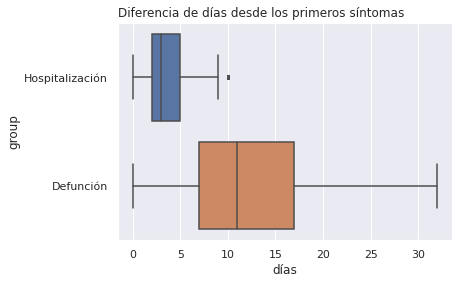

In [66]:
#%%DIST DIAS DEF
def dias_dif(df):
    def reject_outliers(data, m=2):
        return data[abs(data - np.mean(data)) < m * np.std(data)]
    HOSP = reject_outliers(np.asarray(df['DIAS_DIF_HOSP']))
    DEF = reject_outliers(np.asarray( df.loc[df.BOOL_DEF == 1]['DIAS_DIF_DEF']))
    a = pd.DataFrame({ 'group' : np.repeat('Hospitalización',len(HOSP)) , 'días' : HOSP })
    b = pd.DataFrame({ 'group' : np.repeat('Defunción',len(DEF)) , 'días' : DEF })
    df_box=a.append(b)
    ax = sns.boxplot(x='días', y='group', data=df_box, flierprops = dict(markerfacecolor = '0.50', markersize = 2))
    plt.title("Diferencia de días desde los primeros síntomas", loc="left")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.show()
dias_dif(df)
#dias_dif(df_og)

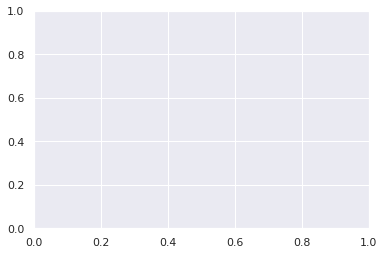

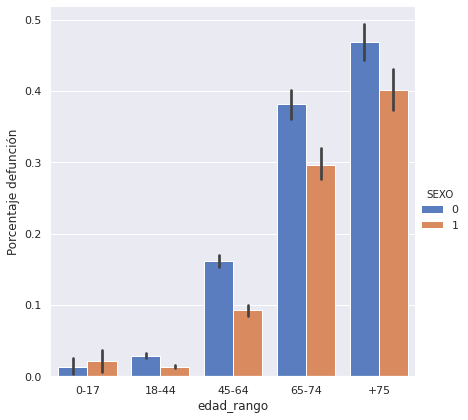

In [67]:
#%%DEF EDADES SEXO
def grafica9(df):
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    fig, ax = plt.subplots()
    g = sns.catplot(x="edad_rango", y="BOOL_DEF", hue="SEXO", data=df,
                height=6, kind="bar", palette="muted", legend=True)
    g.despine(left=True)
    g.set_ylabels("Porcentaje defunción")
grafica9(df)

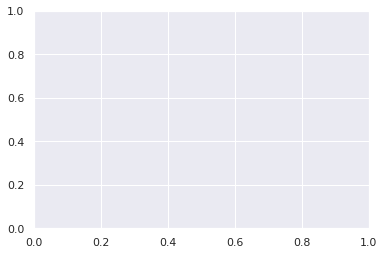

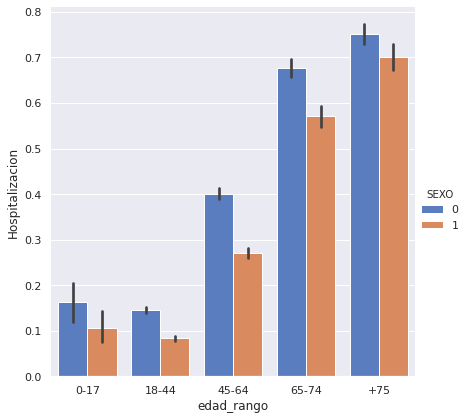

In [68]:
#%%HOSP EDADES SEXO
def grafica10(df):
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    fig, ax = plt.subplots()
    g = sns.catplot(x="edad_rango", y="TIPO_PACIENTE", hue="SEXO", data=df,
                height=6, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("Hospitalizacion")
grafica10(df)

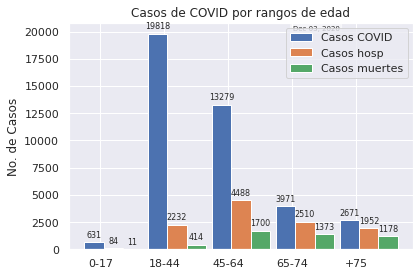

In [69]:
#%%CASOS POR RANGO EDAD
def grafica11(df):
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    labels = df['edad_rango'].cat.categories.tolist()
    covid_rate, hosp_rate, death_rate = [],[], []
    for i in range(len(labels)):
        covid_rate.append(len(df[df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]]))
        hosp_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1)]))
        death_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.BOOL_DEF == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, covid_rate, width, label="Casos COVID")
    bar2 = ax.bar(x + 2*(width/3), hosp_rate, width, label="Casos hosp")
    bar3 = ax.bar(x + 5*(width/3), death_rate, width, label="Casos muertes")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID por rangos de edad")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
grafica11(df)

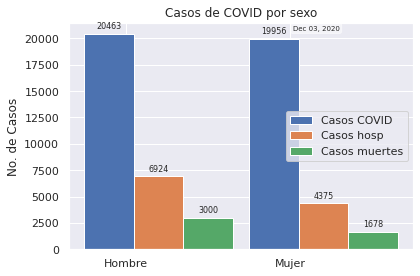

In [70]:
#%%CASOS POR SEXO
def grafica12(df):
    labels = ['Hombre', 'Mujer']
    covid_rate, hosp_rate, death_rate = [],[], []
    for i in range(len(labels)):
        covid_rate.append(len(df[df.SEXO == i]))
        hosp_rate.append(len(df[(df.SEXO == i) & (df.TIPO_PACIENTE == 1)]))
        death_rate.append(len(df[(df.SEXO == i) & (df.BOOL_DEF == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, covid_rate, width, label="Casos COVID")
    bar2 = ax.bar(x + 2*(width/3), hosp_rate, width, label="Casos hosp")
    bar3 = ax.bar(x + 5*(width/3), death_rate, width, label="Casos muertes")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID por sexo")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc="center right")
    
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
grafica12(df)

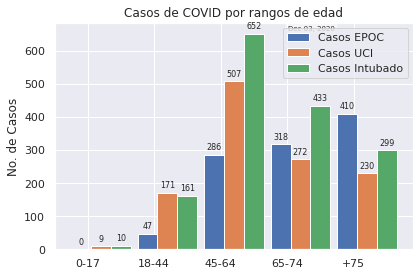

In [71]:
#%%CASOS HOSP POR RANGO EDAD
def grafica14(df):
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,17,44,64,74,max(df['EDAD'])], labels=['0-17','18-44','45-64','65-74','+75'])
    labels = df['edad_rango'].cat.categories.tolist()
    EPOC_rate, UCI_rate, INTUBADO_rate = [],[], []
    for i in range(len(labels)):
        EPOC_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.EPOC == 1)]))
        UCI_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.UCI == 1)]))
        INTUBADO_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.INTUBADO == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, EPOC_rate, width, label="Casos EPOC")
    bar2 = ax.bar(x + 2*(width/3), UCI_rate, width, label="Casos UCI")
    bar3 = ax.bar(x + 5*(width/3), INTUBADO_rate, width, label="Casos Intubado")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID por rangos de edad")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
    fig.tight_layout()
grafica14(df)

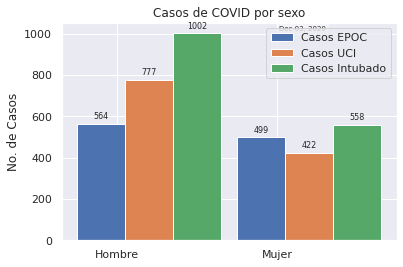

In [72]:
#%%CASOS HOSP POR SEXO
def grafica15(df):
    labels = ['Hombre', 'Mujer']
    covid_rate, hosp_rate, death_rate = [],[], []
    for i in range(len(labels)):
        covid_rate.append(len(df[(df.SEXO == i) & (df.EPOC == 1)]))
        hosp_rate.append(len(df[(df.SEXO == i) & (df.UCI == 1)]))
        death_rate.append(len(df[(df.SEXO == i) & (df.INTUBADO == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.30 #ancho de las barras
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/3, covid_rate, width, label="Casos EPOC")
    bar2 = ax.bar(x + 2*(width/3), hosp_rate, width, label="Casos UCI")
    bar3 = ax.bar(x + 5*(width/3), death_rate, width, label="Casos Intubado")
    ax.set_ylabel("No. de Casos")
    ax.set_title("Casos de COVID por sexo")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8)
    autolabel(bar1); autolabel(bar2); autolabel(bar3)
    #plt.show()
    plot_date(ax)
grafica15(df)

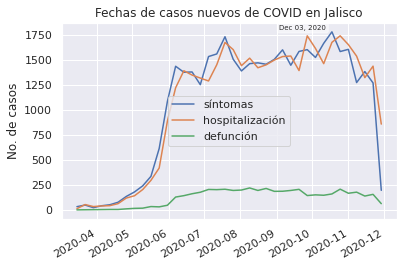

In [73]:
#%%SERIE TIEMPO CASOS NUEVOS
def casos_nuevos_indiv(df,titulo, columna_fecha, estado):
    if estado != False:
        df_aux = df.copy()
        df_aux.drop(df_aux[(df_aux['ENTIDAD_UM'] != estado)].index, inplace = True)
    elif estado == False:
        df_aux = df.copy()
    fechas = Counter(df_aux[columna_fecha])
    fechas = pd.DataFrame.from_dict(fechas, orient='index').reset_index() #convierte el dict a df
    fechas = fechas.rename(columns={'index':'Fecha', 0:'casos'}) #nombra las columnas
    fechas = fechas.sort_values(by='Fecha') #ordena la columna fecha
    fechas.drop(fechas[fechas.index == 0].index, inplace=True) #elimina fila con nan
    fechas['Fecha'] = pd.to_datetime(fechas['Fecha']) #columna fecha la convierte a datetime
    fechas = fechas.set_index('Fecha', append=False) #columna fecha la convierte a index
    fechas.index = fechas.index.date
    #nuevo df con las fechas completas
    fechas_total = pd.DataFrame(index=np.arange(np.datetime64(str(min(df['FECHA_INGRESO']))), np.datetime64(max(df['FECHA_INGRESO']))))
    fechas_total.index = fechas_total.index.date
    fechas_total = pd.merge(fechas_total,fechas, how='left',left_index=True,right_index=True)
    fechas_total = fechas_total.fillna(0)
    fechas_total.index= pd.to_datetime(fechas_total.index) 
    fechas_total=fechas_total.resample('W').sum()
    return fechas_total

def casos_nuevos_total(df,estado, estado_str):
    columnas_fechas = ['FECHA_SINTOMAS', 'FECHA_INGRESO', 'FECHA_DEF']
    list_df = []
    for i, word in enumerate(columnas_fechas):
        list_df.append(casos_nuevos_indiv(df,titulo= str(word)+" nuevos de COVID en "+str(estado_str),columna_fecha=str(word), estado = estado))
    #genera nuevo dataframe con faechas como index
    df_fechas_mex = pd.DataFrame(index=np.arange(np.datetime64(min(df['FECHA_INGRESO'])), np.datetime64(max(df['FECHA_INGRESO']))))
    df_fechas_mex.index = df_fechas_mex.index.date
    df_fechas_mex.index = pd.to_datetime(df_fechas_mex.index) 
    df_fechas_mex=df_fechas_mex.resample('W').sum()
    #juntar las 3 columnas polinomios de fechas en df_fechas_mex
    total_fechas=[]
    for i in range(3):
        df_fechas_mex = pd.merge(df_fechas_mex,list_df[i].iloc[:,0], how='left',left_index=True,right_index=True)
        total_fechas.append(list_df[i].iloc[:,0].mean()) #guardar el total de las columnas fechas
    df_fechas_mex = df_fechas_mex.rename(columns={'casos_x':'síntomas', 'casos_y':'hospitalización','casos':'defunción'}) #nombra las columnas
    df_fechas_mex.index.name = 'fecha'
    #plot
    fig, ax = plt.subplots()
    #################################
    plot_date(ax)
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,0], label='síntomas')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,1], label='hospitalización')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,2], label='defunción')
    plt.title("Fechas de casos nuevos de COVID en "+str(estado_str))
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    plt.legend()
    #plt.tight_layout()
    return df_fechas_mex
serie_tiempo_nuevo = casos_nuevos_total(df,estado=entidad_federativa, estado_str=entidad_federativa_str)

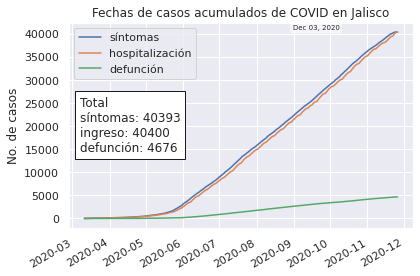

In [74]:
#%%SERIE TIEMPO CASOS ACUM
def casos_acum_indiv(df,titulo, columna_fecha, estado=None):
    if estado != None:
        df_aux = df.copy()
        df_aux.drop(df_aux[(df_aux['ENTIDAD_UM'] != estado)].index, inplace = True)
    elif estado == None:
        df_aux = df.copy()
    fechas = Counter(df_aux[columna_fecha]) #crea diccionario
    fechas = pd.DataFrame.from_dict(fechas, orient='index').reset_index() #convierte el dict a df
    fechas = fechas.rename(columns={'index':'Fecha', 0:'casos'}) #nombra las columnas
    fechas = fechas.sort_values(by='Fecha') #ordena la columna fecha
    fechas.drop(fechas[fechas.index == 0].index, inplace=True) #elimina fila con nan
    fechas['Fecha'] = pd.to_datetime(fechas['Fecha']) #columna fecha la convierte a datetime
    fechas = fechas.set_index('Fecha', append=False) #columna fecha la convierte a index
    fechas.index = fechas.index.date
    #nuevo df con las fechas completas
    fechas_total = pd.DataFrame(index=np.arange(np.datetime64(str(min(df['FECHA_INGRESO']))), np.datetime64(max(df['FECHA_INGRESO']))))
    fechas_total.index = fechas_total.index.date
    fechas_total = pd.merge(fechas_total,fechas, how='left',left_index=True,right_index=True)
    fechas_total = fechas_total.fillna(0)
    #crear cumsum para acumulados
    fechas_total = fechas_total.cumsum(skipna=False)  
    return fechas_total

def casos_acum_total(df,estado, estado_str):
    columnas_fechas = ['FECHA_SINTOMAS', 'FECHA_INGRESO', 'FECHA_DEF']
    list_df = []
    for i, word in enumerate(columnas_fechas):
        list_df.append(casos_acum_indiv(df,titulo= str(word)+" acumulados de COVID en "+str(estado_str),columna_fecha=str(word), estado = estado))
    #genera nuevo dataframe con faechas como index
    df_fechas_mex = pd.DataFrame(index=np.arange(np.datetime64(min(df['FECHA_INGRESO'])), np.datetime64(max(df['FECHA_INGRESO']))))
    df_fechas_mex.index = df_fechas_mex.index.date
    #juntar las 3 columnas de fechas en df
    total_fechas=[]
    for i in range(3):
        df_fechas_mex = pd.merge(df_fechas_mex,list_df[i].iloc[:,0], how='left',left_index=True,right_index=True)
        total_fechas.append(list_df[i].iloc[-1:,0][0]) #guardar el ultimo valor de la columna
    #plot
    fig, ax = plt.subplots()
    texto="Total\nsíntomas: "+str(int(total_fechas[0]))+"\ningreso: "+str(int(total_fechas[1]))+"\ndefunción: "+str(int(total_fechas[2]))
    anchored_text = AnchoredText(texto, loc="center left")
    ax.add_artist(anchored_text)
    #################################
    plot_date(ax)
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,0], label='síntomas')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,1], label='hospitalización')
    ax.plot(df_fechas_mex.index,df_fechas_mex.iloc[:,2], label='defunción')
    plt.title("Fechas de casos acumulados de COVID en "+str(estado_str))
    plt.gcf().autofmt_xdate()
    plt.ylabel("No. de casos")
    plt.legend()
    plt.tight_layout()
    return df_fechas_mex
serie_tiempo_acum = casos_acum_total(df,estado=entidad_federativa, estado_str=entidad_federativa_str)

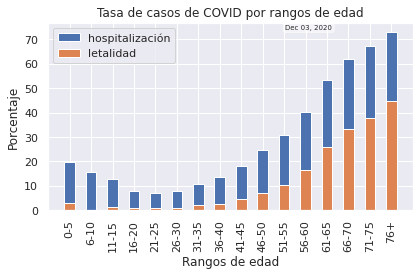

In [75]:
#%%TASA CSOS POR RANGO EDAD
def grafica16(df):
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,max(df['EDAD'])], 
                              labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76+'])
    labels = df['edad_rango'].cat.categories.tolist()
    covid_rate, hosp_rate, death_rate = [],[],[]
    for i in range(len(labels)):
        covid_rate.append(len(df[df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]]))
        hosp_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1)]))
        death_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.BOOL_DEF == 1)]))
    x = np.arange(len(labels)) #pocisiones de labels
    width = 0.5 #ancho de las barras
    fig, ax = plt.subplots()
    #se calcula el procentaje respecto a covid_rate
    hosp_percentage = [ hosp_rate[i]/covid_rate[i]*100 for i in range(len(covid_rate)) ]
    def_percentage = [ death_rate[i]/covid_rate[i]*100 for i in range(len(covid_rate)) ]
    #se grafican las barras
    ax.bar(x , hosp_percentage, width, label="hospitalización")
    ax.bar(x , def_percentage, width, label="letalidad")
    #grafica
    ax.set_ylabel("Porcentaje")
    ax.set_xlabel("Rangos de edad")
    ax.set_title("Tasa de casos de COVID por rangos de edad")
    ax.set_xticks(x)
    plt.xticks(rotation='vertical')
    ax.set_xticklabels(labels)
    ax.legend()
    plot_date(ax)
    fig.tight_layout()
grafica16(df)

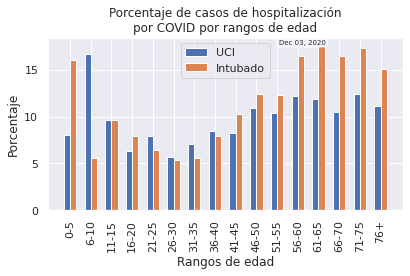

In [76]:
#%%TASA HOSP POR RANGO EDAD
def grafica17(df):
    df['edad_rango'] = pd.cut(x=df['EDAD'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,max(df['EDAD'])], 
                              labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76+'])
    labels = df['edad_rango'].cat.categories.tolist()
    hosp_rate, uci_rate, vent_rate = [],[],[]
    for i in range(len(labels)):
        hosp_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1)]))
        uci_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1) & (df.UCI == 1)]))
        vent_rate.append(len(df[(df.edad_rango == df['edad_rango'].cat.categories.tolist()[i]) & (df.TIPO_PACIENTE == 1) & (df.INTUBADO == 1)]))
    x = np.arange(len(labels)) #posiciones de labels
    width = 0.3 #ancho de las barras
    fig, ax = plt.subplots()
    #se calcula el procentaje respecto a covid_rate
    uci_percentage = [ uci_rate[i]/hosp_rate[i]*100 for i in range(len(hosp_rate)) ]
    vent_percentage = [ vent_rate[i]/hosp_rate[i]*100 for i in range(len(hosp_rate)) ]
    #se grafican las barras
    ax.bar(x -width/2, uci_percentage, width, label="UCI")
    ax.bar(x +width/2, vent_percentage, width, label="Intubado")
    #grafica
    ax.set_ylabel("Porcentaje")
    ax.set_xlabel("Rangos de edad")
    ax.set_title("Porcentaje de casos de hospitalización\npor COVID por rangos de edad")
    ax.set_xticks(x)
    plt.xticks(rotation='vertical')
    ax.set_xticklabels(labels)
    ax.legend()
    plot_date(ax)
    fig.tight_layout()
grafica17(df)

No handles with labels found to put in legend.


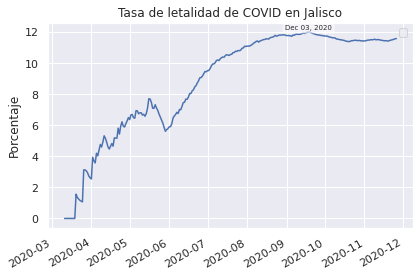

In [77]:
def mort_porcentaje(df,estado, estado_str):
    columnas_fechas = ['FECHA_SINTOMAS', 'FECHA_DEF']
    list_df = []
    for i, word in enumerate(columnas_fechas):
        list_df.append(casos_acum_indiv(df,titulo= str(word)+" acumulados de COVID en "+str(estado_str),columna_fecha=str(word), estado = estado))
    #genera nuevo dataframe con faechas como index
    df_fechas_mex = pd.DataFrame(index=np.arange(np.datetime64(min(df['FECHA_INGRESO'])), np.datetime64(max(df['FECHA_INGRESO']))))
    df_fechas_mex.index = df_fechas_mex.index.date
    #juntar las columnas de fechas en df
    for i in range(2):
        df_fechas_mex = pd.merge(df_fechas_mex,list_df[i].iloc[:,0], how='left',left_index=True,right_index=True)
    mort_porcentaje = [ df_fechas_mex.iloc[:,1][i]/df_fechas_mex.iloc[:,0][i]*100 for i in range(len(df_fechas_mex.iloc[:,0])) ]
    #plot
    fig, ax = plt.subplots()
    plot_date(ax)
    ax.plot(df_fechas_mex.index,mort_porcentaje)
    plt.title("Tasa de letalidad de COVID en "+str(estado_str))
    plt.gcf().autofmt_xdate()
    plt.ylabel("Porcentaje")
    plt.legend()
    plt.tight_layout()
mort_porcentaje(df,estado=entidad_federativa, estado_str=entidad_federativa_str)

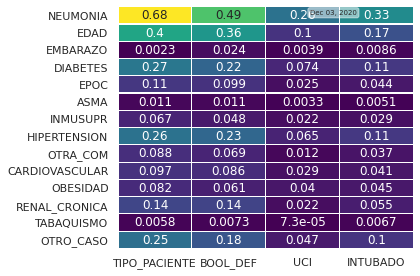

In [78]:
#%%MATRIZ CORRELACION
def mat_corr(df):
    #hacer columna de hombre y de mujer para reemplazar sexo
    data_matcorr = df.copy()
    data_matcorr = data_matcorr.loc[:,['NEUMONIA','EDAD','EMBARAZO','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO','OTRO_CASO','TIPO_PACIENTE','BOOL_DEF','UCI','INTUBADO']]
    df1 = data_matcorr.corr()[['TIPO_PACIENTE']] 
    df2 = data_matcorr.corr()[['BOOL_DEF']] 
    df3 = data_matcorr.corr()[['UCI']] 
    df4 = data_matcorr.corr()[['INTUBADO']] 
    df_matcorr = df1.join(df2, how='outer')
    df_matcorr = df_matcorr.join(df3, how='outer')
    df_matcorr = df_matcorr.join(df4, how='outer')
    df_matcorr = df_matcorr.drop(index=(['TIPO_PACIENTE','BOOL_DEF','UCI','INTUBADO']))
    df_matcorr = df_matcorr.abs()
    fig, ax = plt.subplots()
    sns.heatmap(df_matcorr, 
                annot=True, 
                linewidths=0.1, 
                linecolor='white',
                cbar=False,
                cmap='viridis')
    plot_date(ax)
    fig.tight_layout()
mat_corr(df_og)